# Homework 3: Coding

**Due Monday October 5th, 11:59pm.**

**Submit hw3.ipynb file to Gradescope (you may submit as many times as you'd like before the deadline).**

In [1]:
"""
Import libraries that you might require.

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LogisticRegression

np.__version__

'1.19.1'

In [2]:
"""
FOR COLAB USERS ONLY

Run the following code to upload and unzip the data into the Colab environment.

"""
# from google.colab import files
# uploaded = files.upload()
# ! unzip hw3_q3.zip

'\nFOR COLAB USERS ONLY\n\nRun the following code to upload and unzip the data into the Colab environment.\n\n'

# Question 3: Kernel Regression

In this question, you are going to implement a Kernel Regression model using Gaussian kernel method.

Given a training dataset $S=((\mathbf{x_1}, y_1), \ldots , (\mathbf{x_n}, y_n))$, and kernel function $K(\cdot,\cdot)$, the predicted value $\hat{y}$ of an input data $\mathbf{x}$ is:
$$\hat{y}(\mathbf{x}) = \frac{\sum_{i=1}^n K(\mathbf{x}, \mathbf{x_i}) y_i}{\sum_{i=1}^n K(\mathbf{x}, \mathbf{x_i}) }$$, where $K(\mathbf{x}, \mathbf{x_i}) = \text{exp}(\frac{-||\mathbf{x} - \mathbf{x_i}||_2^2}{\sigma^2})$


## Question 3.1 Build the model.
Fill in your code for function **GaussianKernel** and **kernelRegression**. For $\sigma = \{0.01, 0.05, 0.1, 0.15, 0.2, 0.5, 1.0\}$, fill in your code for function **evaluation** to compute the means squared error of the model for each $\sigma$ value.

In [9]:
"""
Reads the data.
"""
# TODO your code here

X_test = pd.read_table("hw3_q3/X_test.txt", header=None)[0]
y_test = pd.read_table("hw3_q3/y_test.txt", header=None)[0]
X_train = pd.read_table("hw3_q3/X_train.txt", header=None)[0]
y_train = pd.read_table("hw3_q3/y_train.txt", header=None)[0]

In [10]:
# build the model
def GaussianKernel(sigma, vec1, vec2):
    """
    Computes the gaussian kernel between two d-dim vectors
    Args:
        sigma: a single floating number
        vec1: (d,)-shape numpy vector
        vec2: (d,)-shape numpy vector
    Returns:
        distance: a single floating number
    """
    # TODO your code here: Question 3.1
    a1 = np.array(vec1, dtype=np.float128)
    a2 = np.array(vec2, dtype=np.float128)
    distance = np.exp(np.linalg.norm(a1-a2)/np.power(sigma, 2))
    return distance


def kernelRegression(X_train, y_train, X_test, sigma):
    """
    Computes the predicted values for test set X_test based on kernel regression model
    Args:
        X_train: (n,p) feature matrix of training set
        y_train: truth value of training set
        X_test: feature matrix of test set
        sigma: hyperparameter for Gaussian kernel
    Returns:
        y_predict: list of predicted target values for X_test
    """
    # TODO your code here: Question 3.1
    # You need to call the function "GaussianKernel" here
    y_predict = [0]*len(X_test)    # initialzation
    n = len(X_train)
    m = len(X_test)
    for j in range(m):
        numerator = 0
        denominator = 0
        for i in range(n):
            v = GaussianKernel(sigma, X_test[j], X_train[i])
            numerator +=  v * y_train[i]
            denominator += v
        y_predict[j] = numerator/denominator
    return y_predict


# evaluate the model
def evaluation(y_predict, y_true):
    """
    Computes the mean squared error for regression task.
    
    Args:
        y_predict: list of predicted target values
        y_true: list or numpy array of true target values
    
    Returns:
        error: a floating point number representing the error for a validation or test set
    """    
    # TODO your code here: Question 3.1
    # you can use the sklearn libary mean_squared_error
    
    error = mean_squared_error(y_predict, y_true)
    return error

## Question 3.2 Analysis of the model.
Similar to what you did for HW2, plot a figure for each sigma value of predicted regression line and scatter plot of data points in the test set. Report the sigma value with the smallest MSE for the test set. How the value of sigma affects the kernel regression model? Compare the figures in this question with the figure in question 1.1 of HW2. Describe your findings based on the comparison.

In [11]:
# plot the kernel regression result
def plotRegression(X_train, y_train, X_test, y_test, y_pred, sigma):
    """
    Plot the predicted regression line and scattor plot of data points in the test set
    Args:
        sigma: sigma value for Gqussian kernel
    Return:
        error: mean squared error of the model given the sigma
    """
    error = evaluation(y_pred, y_test)
    x = np.linspace(0,1,1000)
    y_regression = kernelRegression(X_train, y_train, x, sigma)
    
    plt.plot(x, y_regression, '-', color = 'red')
    plt.scatter(X_test, y_test, alpha = 0.75)
    plt.title('Gaussian kernel regression with sigma = ' + str(sigma) + '\n MSE = ' + str(error))
    plt.xlabel('feature value')
    plt.ylabel('target value')
    plt.show()

    
def main(X_train, y_train, X_test, y_test, sigma_set):
    """
    Build the Gaussian kernel regression for each sigma in sigma_set, and then plot the result
    """
    for sigma in sigma_set:
        y_pred = kernelRegression(X_train, y_train, X_test, sigma)
        plotRegression(X_train, y_train, X_test, y_test, y_pred, sigma)

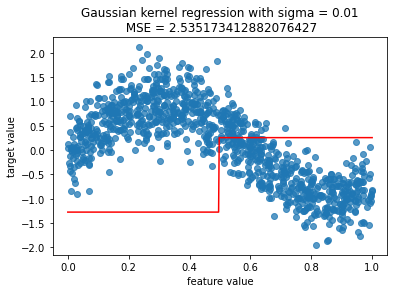

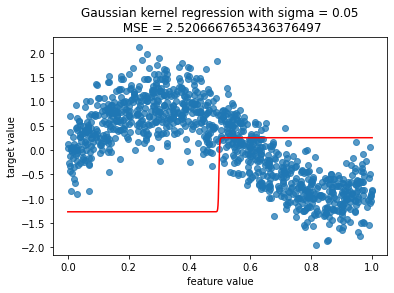

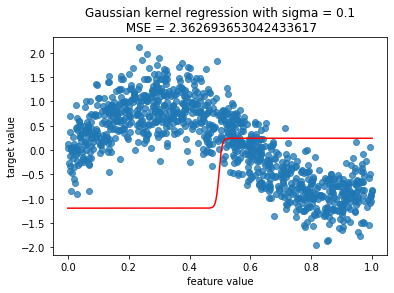

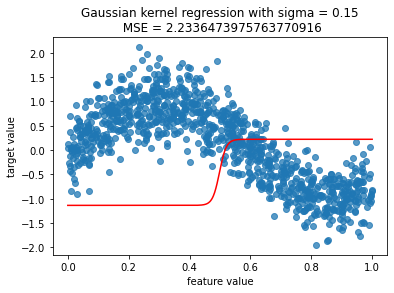

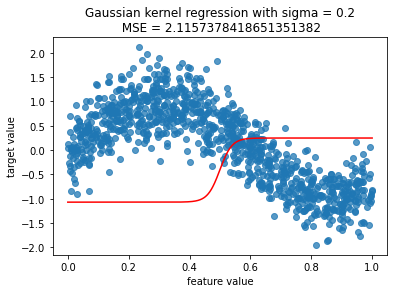

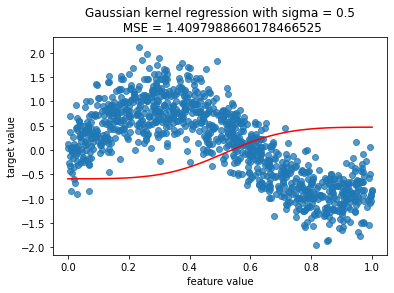

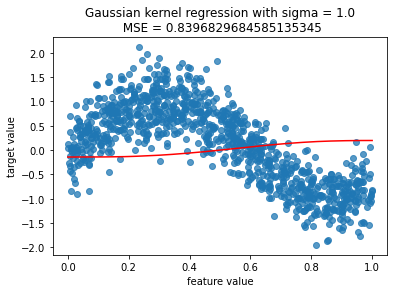

In [12]:
""" 
Finally, we call the main function.
"""
sigma_set = [0.01, 0.05, 0.1, 0.15, 0.2, 0.5, 1.0]
main(X_train, y_train, X_test, y_test, sigma_set)

The answer for quesiton 3.2 should be written on the PDF file that you submit to Gradescope.

# Question 4: Logistic Regression and Gradient Descent

In [13]:
"""
Import required libraries.

"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LogisticRegression

In [15]:
"""
FOR COLAB USERS ONLY

Run the following code to upload and unzip the data into the Colab environment.

"""
# from google.colab import files
# uploaded = files.upload()
# ! unzip hw3_house_sales.zip

'\nFOR COLAB USERS ONLY\n\nRun the following code to upload and unzip the data into the Colab environment.\n\n'

Implement the following functions for question 1. Please use the sklearn implementation of linear regression or other imports beyond those listed above.

In [17]:
"""
load data, a const dimension (for weight b) is already included in X.
"""
X_train = pd.read_csv('hw3_house_sales/X_train.csv')
X_test = pd.read_csv('hw3_house_sales/X_test.csv')
y_train = pd.read_csv('hw3_house_sales/y_train.csv')
y_test = pd.read_csv('hw3_house_sales/y_test.csv')

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(X_test.head(5))
print(y_test.head(5))

(800, 11)
(400, 11)
(800, 1)
(400, 1)
   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  GrLivArea  \
0    11851            7            5       1990          1990       1442   
1     9920            7            5       1996          1997       2013   
2    11216            8            5       2006          2006       1489   
3     8244            7            5       2004          2004       1720   
4    11787            7            5       1996          1997       2398   

   FullBath  BedroomAbvGr  KitchenAbvGr  YrSold  const  
0         2             3             1    2009      1  
1         2             3             1    2007      1  
2         2             3             1    2006      1  
3         2             3             1    2007      1  
4         2             3             1    2007      1  
   label
0      1
1      1
2      1
3      1
4      1


In [18]:
"""
Do some data preparation, convert dataframe to numpy array
"""
n_features = X_train.shape[1]

w = np.zeros((1, n_features))

# turn dataframe to np array
X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

m_train =  X_train.shape[0]
m_test =  X_test.shape[0]

**Logistic regression with scikit** Fill in the logisticRegressionScikit() function. Report the weights, training accuracy, and the test accuracy. We will not use any penalty here, so set the parameters penalty = 'none', solver = 'saga'.Also, we will use 2000 iterations for a fair comparison to later algorithms, so also set the parameter max_iter=2000.

In [19]:
def LogisticRegressionScikit(X_train, y_train, X_test, y_test):

    """
    Computes logistic regression with scikit-learn.
    
    Args:
        X_train: feature matrix of training set, np array of (n, p)
                 where n is the number of training observations, 
                 p is the number of features
        y_train: truth value of training set, np array of (n, 1)

        X_test: feature matrix of test set, np array of (m, p)
                 where m is the number of test observations,
                 p is the number of features
        y_test: truth value of test set, np array of (m, 1)

    Returns:  
        w: numpy array of learned coefficients
        y_pred: numpy array of predicted labels for the test data
        score: accuracy of test data
    """
    clf = LogisticRegression(penalty = 'none', solver = 'saga', fit_intercept=False)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    coef = clf.coef_
    return coef, y_pred, score

In [20]:
"""
Results for logistic regression Scikit function
"""

coef_scikit, y_pred_scikit, acc_scikit = LogisticRegressionScikit(X_train, y_train, X_test, y_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(acc_scikit))
print('logistic regression coefficient:', coef_scikit)

Accuracy of logistic regression classifier on test set: 0.77
logistic regression coefficient: [[ 1.30303926e-04  1.76009141e-06 -1.31549281e-06 -3.08981791e-04
  -3.31886279e-04  5.17625055e-04  6.98210886e-07 -3.08513270e-07
  -3.23529642e-07 -3.70329098e-04 -1.84468269e-07]]


/home/sheil/miniconda3/envs/TF/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/sheil/miniconda3/envs/TF/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


**Logistic regression with simple gradient descent** Fill in the LogisticRegressionGD() function. To do that, two helper functions sigmoid_activation(), to calculate the sigmoid function result, and model_optimize(), to calculate the gradient of w, will be needed. Both helper functions can be used in the following AdaGrad optimization function. Use a learning rate of $10^{−4}$, run with 2000 iterations. Report the weights and accuracy. Keep track of the accuracy every 100 iterations in the training set. It will be used later.

In [21]:
def sigmoid_activation(result):
    """
    Calculates the sigmoid function.
    
    Args:
        x: numpy array of input, of shape (1, n)
           where n is the number of observations
        
    Returns:
        final_result: numpy array of sigmoid result, of shape (1, n)
                      where n is the number of observations
    """
    final_result = [1.0 / (1 + np.exp(-x)) for x in result]
    return final_result

We add a predict() function here to threshold probability prediction into binary classification

In [22]:
def predict(final_pred, n):
    """
    Predict labels from probability to 0/1 label, threshold 0.5.
    
    Args:
        final_pred: numpy array of probabilty that each sample belonging to class 1, of shape (1, n)
                    where n is the number of observations 
        
    Returns:
        y_pred: numpy array of label of each sample, of shape (1, n)
                where n is the number of observations
    """
    res = list(final_pred[0])
    y_pred = [0 if x<0.5 else 1 for x in res]
    return np.array(y_pred)

**Remember to derive the gradient, write down the weight update formula, and hand in them to the latex submission!**

In [23]:
def model_optimize(w, X, Y):
    
    """
    Calculates gradient of the weights.
    
    Args:
        X: numpy array of training samples of shape (n, p)
           where n is the number of observations
           p is the number of features
        Y: numpy array of training labels of shape (n, 1)
        w: numpy array of weights of shape (1, p)
    Returns:
        dw: the gradient of the weights of shape (1, p)
    """
    result = sigmoid_activation(np.dot(X, w.T))
    res = np.subtract(result, Y)
    m = len(X)
    dw = (1/m)*np.dot(res.T, X)
    return dw

In [24]:
def LogisticRegressionGD(w, X, Y, learning_rate, num_iterations):
    """
    Uses batch gradient descent to update weights for logistic regression.

    Args:       
        w: numpy array of initial weights of shape (1, p)
           where p is the number of features
        X: numpy array of training samples of shape (n, p)
           where n is the number of observations
        Y: numpy array of training labels of shape (n, 1)
        learning_rate: float number learning rate to update w
        num_iterations: int number of iterations to update w
    
    Returns:  
        coeff: numpy array of weights after optimization of shape (1, p)
        accuracies: a list of accuracy at each hundred's iteration. With 2000 iterations, 
                    accuracies should be a list of size 21 (starting from 0)
    """
    accuracies = []
    m = len(X)
    for i in range(num_iterations):
        w_new = w - learning_rate*model_optimize(w, X, Y)
        w = w_new
        if i > 0 and i%100 ==0:
            y_pred = predict(sigmoid_activation(np.dot(w, X.T)), len(X))
            accuracies.append(accuracy_score(y_pred, Y))
    coeff = w
    return coeff, accuracies

**Logistic regression with AdaGrad** Fill in the LogisticRegressionAda() function. Use a learning rate of $10^{−4}$, run with 2000 iterations. Report the weights and accuracy. Keep track of the accuracy every 100 iterations in the training set. It will be used later.

In [25]:
def LogisticRegressionAda(w, X, Y, learning_rate, num_iterations):

    """
    Use AdaGrad to update weights.
    
    Args:       
        w: numpy array of initial weights of shape (1, p)
           where p is the number of features
        X: numpy array of training samples of shape (n, p)
           where n is the number of observations
        Y: numpy array of training labels of shape (n, 1)
        learning_rate: float number learning rate to update w
        num_iterations: int number of iterations to update w
    
    Returns:  
        coeff: numpy array of weights after optimization of shape (1, p)
        accuracies: a list of accuracy at each hundred's iteration. With 2000 iterations, 
                    accuracies should be a list of size 21 (starting from 0)
    """

    accuracies = []
    m = len(X)
    epsilon = 0.000001
    v_0 = 0
    for i in range(num_iterations):
        grad = model_optimize(w, X, Y)
        vt = v_0 + np.power(grad, 2)
        v_0 = vt
        w_new = w - (learning_rate/np.sqrt(vt+epsilon))*grad
        w = w_new
        if i > 0 and i%100 ==0:
            y_pred = predict(sigmoid_activation(np.dot(w, X.T)), len(X))
            accuracies.append(accuracy_score(y_pred, Y))
    coeff = w
    return coeff, accuracies

Now we start to use our dataset and construct model.

Model construction for GD logistic regression.

In [26]:
"""
Results for gradient descent weight update
"""

# Gradient Descent
coeff_GD, acc_GD = LogisticRegressionGD(w, X_train, y_train, learning_rate=0.0001,num_iterations=2000)

# predict probability
final_train_pred_GD = sigmoid_activation(np.dot(coeff_GD, X_train.T) )
final_test_pred_GD = sigmoid_activation(np.dot(coeff_GD, X_test.T) )
# predict label
y_train_pred_GD = predict(final_train_pred_GD, m_train)
y_test_pred_GD = predict(final_test_pred_GD, m_test)

print('Optimized weights for GD', coeff_GD)

print('Training Accuracy for GD', accuracy_score(y_train_pred_GD.T, y_train))
print('Test Accuracy for GD', accuracy_score(y_test_pred_GD.T, y_test))

/home/sheil/miniconda3/envs/TF/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


Optimized weights for GD [[-2.96955899e-02  5.19156140e-02 -1.11265500e-02 -3.25667413e-01
  -9.72531664e-01  3.45622486e+00  1.54347295e-02 -1.56008344e-02
  -6.73305799e-03 -1.81654230e+00 -9.05292052e-04]]
Training Accuracy for GD 0.6675
Test Accuracy for GD 0.675


Model construction for AdaGrad logistic regression.

In [27]:
"""
Results for AdaGrad Descent weight update
Please comment out these statements before converting to .py file and submitting.
"""
coeff_Ada, acc_Ada = LogisticRegressionAda(w, X_train, y_train, learning_rate=0.0001, num_iterations=2000)

# predict probability
final_train_pred_Ada = sigmoid_activation(np.dot(coeff_Ada, X_train.T) )
final_test_pred_Ada = sigmoid_activation(np.dot(coeff_Ada, X_test.T) )

# predict label
y_train_pred_Ada = predict(final_train_pred_Ada, m_train)
y_test_pred_Ada = predict(final_test_pred_Ada, m_test)

print('Optimized weights for Ada', coeff_Ada)

print('Training Accuracy for Ada', accuracy_score(y_train_pred_Ada.T, y_train))
print('Test Accuracy for Ada', accuracy_score(y_test_pred_Ada.T, y_test))

Optimized weights for Ada [[ 8.56662029e-05  7.32614095e-03 -4.06503117e-03 -1.84270727e-04
  -1.05933198e-03  4.09573976e-03  7.04325651e-03 -7.02782768e-03
  -6.96842728e-03 -2.22061369e-03 -2.21480516e-03]]
Training Accuracy for Ada 0.82375
Test Accuracy for Ada 0.815


Plot accuracy vs iteration for GD and AdaGrad. Compare the performance difference. Briefly explain the reason.

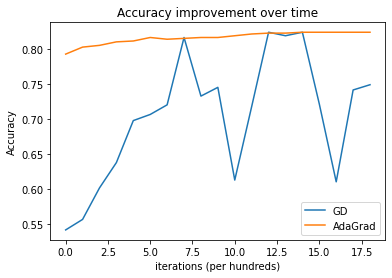

In [29]:
"""
Plot accuracy vs iteration for GD and AdaGrad
"""
plt.plot(acc_GD, label='GD')
plt.plot(acc_Ada, label='AdaGrad')
plt.ylabel('Accuracy')
plt.xlabel('iterations (per hundreds)')
plt.title('Accuracy improvement over time')
plt.legend(loc='lower right')
plt.show()